In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [4]:
data=pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory data analysis

In [6]:
data.shape

(5110, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill Null Values

In [9]:
data['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [10]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

/var/folders/pg/p5rrd54j5d537p9bjccw3hzr0000gn/T/ipykernel_1872/620513141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(),inplace=True)


In [12]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [13]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
data.drop('id',axis=1,inplace=True)

In [15]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Outlier Removation

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

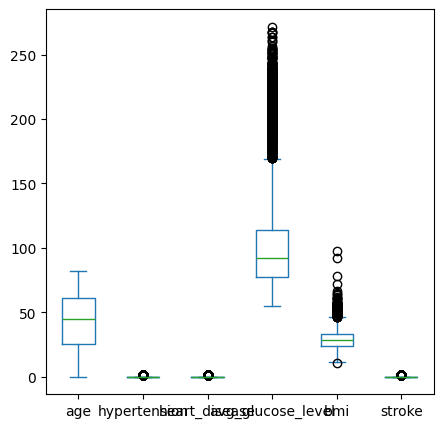

In [17]:
data.plot(kind='box')
plt.show()

# Label Encoding

In [18]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [19]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [20]:
gender=enc.fit_transform(data['gender'])

In [21]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [22]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [23]:
data['work_type']=work_type

In [24]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [25]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [27]:
X=data.drop('stroke',axis=1)

In [28]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [29]:
Y=data['stroke']

In [30]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [31]:
Y.max()

1

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [33]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,0,36.0,0,0,1,2,0,67.29,36.7,1
2277,0,34.0,0,0,1,2,0,83.53,48.5,1
3002,1,60.0,0,0,1,2,0,65.16,30.8,2
246,0,75.0,0,0,1,3,0,78.80,29.3,1
2825,1,76.0,0,0,1,2,1,58.65,25.6,3
...,...,...,...,...,...,...,...,...,...,...
4931,0,53.0,1,0,1,0,0,98.61,38.8,3
3264,0,61.0,0,0,1,2,0,72.01,26.0,1
1653,1,44.0,0,0,1,2,0,94.71,28.4,3
2607,1,21.0,0,0,0,2,1,120.94,29.7,1


In [34]:
Y_train

3029    0
2277    0
3002    0
246     1
2825    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: stroke, Length: 4088, dtype: int64

In [35]:
Y_train.max()

1

In [36]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,1,82.0,0,1,1,2,1,144.90,26.400000,3
380,1,4.0,0,0,0,4,0,106.22,16.700000,0
3524,1,58.0,0,0,1,2,1,79.95,25.900000,2
352,0,20.0,0,0,0,2,0,96.57,34.100000,2
4927,0,10.0,0,0,0,4,0,69.84,13.700000,0
...,...,...,...,...,...,...,...,...,...,...
472,0,43.0,0,0,1,2,0,75.05,22.900000,3
4446,0,42.0,0,0,1,2,1,191.94,27.900000,2
660,1,52.0,0,0,0,2,0,69.37,36.200000,0
57,1,78.0,0,0,1,2,1,237.75,28.893237,1


In [37]:
Y_test

42      1
380     0
3524    0
352     0
4927    0
       ..
472     0
4446    0
660     0
57      1
2367    0
Name: stroke, Length: 1022, dtype: int64

In [38]:
Y_test.max()

1

# Normalize

In [39]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [40]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [41]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [42]:
import pickle
import os


In [43]:
scaler_path=os.path.join('models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [44]:
X_train_std

array([[-0.8361144 , -0.32824306, -0.33206349, ..., -0.86023092,
         0.99513416, -0.35492266],
       [-0.8361144 , -0.41649391, -0.33206349, ..., -0.50170259,
         2.50152031, -0.35492266],
       [ 1.193598  ,  0.73076708, -0.33206349, ..., -0.90725464,
         0.24194108,  0.57814732],
       ...,
       [ 1.193598  ,  0.02476032, -0.33206349, ..., -0.25488321,
        -0.06444255,  1.5112173 ],
       [ 1.193598  , -0.9901244 , -0.33206349, ...,  0.32419302,
         0.10151525, -0.35492266],
       [-0.8361144 ,  0.64251624,  3.01147232, ..., -1.03176818,
         0.5483247 ,  0.57814732]])

In [45]:
X_test_std

array([[ 1.19359800e+00,  1.70152638e+00, -3.32063487e-01, ...,
         8.53154763e-01, -3.19762237e-01,  1.51121730e+00],
       [ 1.19359800e+00, -1.74025658e+00, -3.32063487e-01, ...,
        -7.78468796e-04, -1.55806272e+00, -1.28799263e+00],
       [ 1.19359800e+00,  6.42516237e-01, -3.32063487e-01, ...,
        -5.80737776e-01, -3.83592159e-01,  5.78147322e-01],
       ...,
       [ 1.19359800e+00,  3.77763701e-01, -3.32063487e-01, ...,
        -8.14311033e-01,  9.31304234e-01, -1.28799263e+00],
       [ 1.19359800e+00,  1.52502469e+00, -3.32063487e-01, ...,
         2.90299190e+00, -1.47600169e-03, -3.54922655e-01],
       [-8.36114403e-01, -3.72368483e-01, -3.32063487e-01, ...,
        -5.07442576e-01, -1.16231721e+00, -3.54922655e-01]])

# Training

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [47]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [48]:
dt.feature_importances_

array([0.03356057, 0.1914587 , 0.03469837, 0.02069571, 0.00581771,
       0.03605732, 0.05376742, 0.27846425, 0.26744306, 0.07803688])

In [49]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [50]:
Y_pred_dt=dt.predict(X_test_std) ## X_test_std

In [51]:
Y_pred_dt.max()

1

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
ac_dt=accuracy_score(Y_test,Y_pred_dt)

In [54]:
ac_dt

0.9168297455968689

In [55]:
import joblib
model_path=os.path.join('models/dt.sav')
joblib.dump(dt,model_path)

['models/dt.sav']

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [57]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [58]:
Y_pred_lr=lr.predict(X_test_std)

In [59]:
Y_pred_lr.max()

0

In [60]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [61]:
ac_lr

0.9471624266144814

# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [63]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [64]:
Y_pred_knn=knn.predict(X_test_std)

In [65]:
Y_pred_knn.max()

1

In [66]:
ac_knn=accuracy_score(Y_test,Y_pred_knn)

In [67]:
ac_knn

0.9471624266144814

In [68]:
# import joblib
# model_path=os.path.join('C:/Users/my pc/Desktop/ML/Stroke-Risk-Prediction-using-Machine-Learning-master/','models/knn.sav')
# joblib.dump(knn,model_path)

# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [70]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [71]:
Y_pred_rf=rf.predict(X_test_std)

In [72]:
Y_pred_rf.max()

1

In [73]:
ac_rf=accuracy_score(Y_test,Y_pred_rf)

In [74]:
ac_rf

0.9471624266144814

In [75]:
ac_knn

0.9471624266144814

In [76]:
ac_dt

0.9168297455968689

In [77]:
ac_lr

0.9471624266144814

# SVM

In [78]:
from sklearn.svm import SVC

In [79]:
sv=SVC()

In [80]:
sv.fit(X_train_std,Y_train)

SVC()

In [81]:
Y_pred_sv=sv.predict(X_test_std)

In [82]:
Y_pred_sv.max()

0

In [83]:
ac_sv=accuracy_score(Y_test,Y_pred_sv)

In [84]:
ac_sv

0.9471624266144814

In [85]:
ac_lr

0.9471624266144814

# Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gb = GradientBoostingClassifier()

In [88]:
gb.fit(X_train_std,Y_train)

GradientBoostingClassifier()

In [89]:
Y_pred_gb=gb.predict(X_test_std)

In [90]:
Y_pred_gb.max()

1

In [91]:
ac_gb=accuracy_score(Y_test,Y_pred_gb)
ac_gb

0.9452054794520548

#  Stochastic Gradient Descent

In [92]:
from sklearn.linear_model import SGDClassifier

In [93]:
sgd = SGDClassifier()

In [94]:
sgd.fit(X_train_std,Y_train)

SGDClassifier()

In [95]:
Y_pred_sgd=sgd.predict(X_test_std)

In [96]:
Y_pred_sgd.max()

0

In [97]:
ac_sgd=accuracy_score(Y_test,Y_pred_sgd)
ac_sgd

0.9471624266144814

# Naive Bayes

# Gaussian NB

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
gnb = GaussianNB()

In [100]:
gnb.fit(X_train_std,Y_train)

GaussianNB()

In [101]:
Y_pred_gnb=gnb.predict(X_test_std)

In [102]:
Y_pred_gnb.max()

1

In [103]:
ac_gnb=accuracy_score(Y_test,Y_pred_gnb)
ac_gnb

0.8825831702544031

# Multinomial NB

In [104]:
from sklearn.naive_bayes import MultinomialNB


In [105]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)



MultinomialNB()

In [106]:
Y_pred_mnb=mnb.predict(X_test_std)
Y_pred_mnb.max()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


1

In [107]:
ac_mnb=accuracy_score(Y_test,Y_pred_mnb)
ac_mnb

0.9060665362035225

# Bernoulli NB

In [108]:
from sklearn.naive_bayes import BernoulliNB


In [109]:
bnb = BernoulliNB()
bnb.fit(X_train_std,Y_train)



BernoulliNB()

In [110]:
Y_pred_bnb=bnb.predict(X_test_std)
Y_pred_bnb.max()

1

In [111]:
ac_bnb=accuracy_score(Y_test,Y_pred_bnb)
ac_bnb

0.9422700587084148

# Complement NB

In [112]:
from sklearn.naive_bayes import ComplementNB

In [113]:
cnb = ComplementNB()
cnb.fit(X_train,Y_train)



ComplementNB()

In [114]:
Y_pred_cnb=cnb.predict(X_test_std)
Y_pred_cnb.max()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


1

In [115]:
ac_cnb=accuracy_score(Y_test,Y_pred_cnb)
ac_cnb

0.7651663405088063

# XG Boost

In [120]:
import xgboost as xgb
from xgboost import XGBClassifier


In [121]:
xgb = XGBClassifier()
xgb.fit(X_train_std,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
Y_pred_xgb=xgb.predict(X_test_std)
Y_pred_xgb.max()

1

In [123]:
ac_xgb=accuracy_score(Y_test,Y_pred_xgb)
ac_xgb

0.9461839530332681

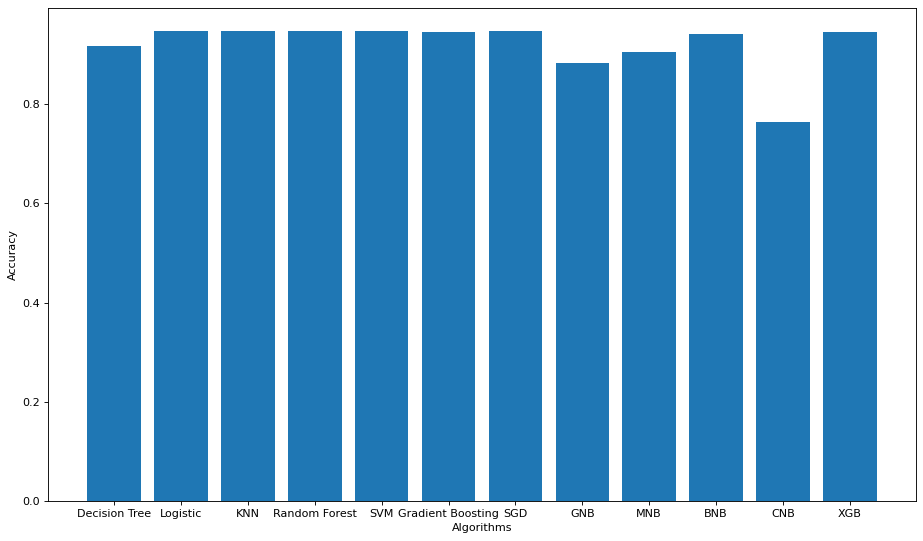

In [124]:
from matplotlib.pyplot import figure
figure(figsize=(14, 8), dpi=80)
algorithms = ['Decision Tree','Logistic','KNN','Random Forest','SVM','Gradient Boosting','SGD','GNB','MNB','BNB','CNB','XGB']
accuracy = [ac_dt,ac_lr,ac_knn,ac_rf,ac_sv,ac_gb,ac_sgd,ac_gnb,ac_mnb,ac_bnb,ac_cnb,ac_xgb]
plt.bar(algorithms,accuracy)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
# for i, v in enumerate(accuracy):
#     plt.text(i-.25, 
#               v/accuracy[i]+100, 
#               accuracy[i], 
#               fontsize=18, 
             
plt.show()

In [125]:
Y_pred_dt.max()


1

In [126]:
print(Y_pred_dt.max(),
Y_pred_sv.max(),
Y_pred_rf.max(),
Y_pred_lr.max(),
Y_pred_knn.max(),
 Y_pred_gb.max(),
 Y_pred_sgd.max(),
 Y_pred_gnb.max(),
Y_pred_mnb.max(),
 Y_pred_bnb.max(),
 Y_pred_cnb.max(),
 Y_pred_xgb.max(),)

1 0 1 0 1 1 0 1 1 1 1 1


In [127]:
Y_pred_knn.max()

1

In [128]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [129]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [130]:
import numpy as np
testtt = np.array([[0,44.0,0,0,1,0,1,85.28,26.200000,0]])

In [131]:
print(lr.predict(testtt))
print(sv.predict(testtt))
print(dt.predict(testtt))
print(rf.predict(testtt))
print(knn.predict(testtt))
print(gb.predict(testtt))
print(sgd.predict(testtt))
print(gnb.predict(testtt))
print(mnb.predict(testtt))
print(bnb.predict(testtt))
print(cnb.predict(testtt))
print(xgb.predict(testtt))


[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(
